IBI MSE: 0.0633 MAE: 0.0062 WAS: 0.031 WASR2: 0.240
HNC MSE: 0.0412 MAE: 0.0008 WAS: 0.006 WASR2: 0.045
NLA  MSE: 0.0312 MAE: 0.0005 WAS: 0.005 WASR2: 0.030


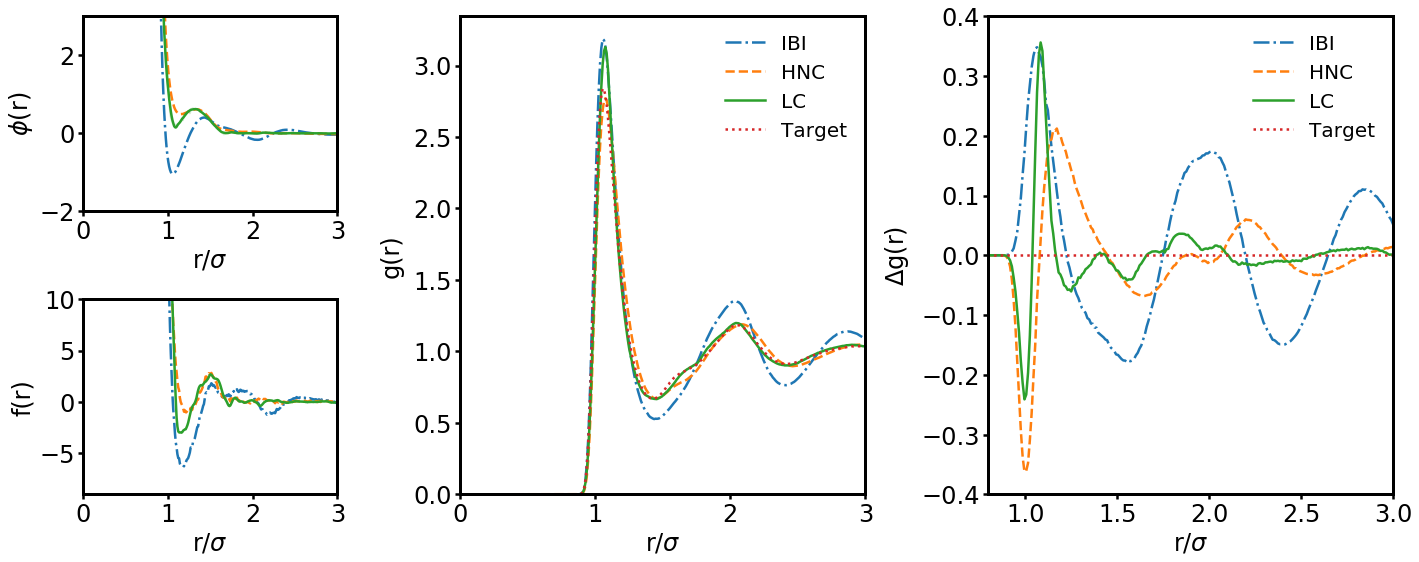

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse, median_absolute_error as mae
from scipy.stats import wasserstein_distance as w_dist

def rmse(x_1, x_2):
    return np.sqrt(mse(x_1,x_2))

rdf_aim = np.loadtxt("../data/test/rdf_lj_mix_p0.8_n6400_t1.0.dat")
r = rdf_aim[0,:]
rdf_aim = np.mean(rdf_aim[1:,:], axis=0)
r_ibi = np.loadtxt("../data/test/down/rdf_ibi_lj-mix_p0.8_b20.0_t1.0.dat")[0,:]
rdf_ibi = np.mean(np.loadtxt("../data/test/down/rdf_ibi_lj-mix_p0.8_b20.0_t1.0.dat")[1:,:], axis=0)
rdf_hnc = np.mean(np.loadtxt("../data/test/down/rdf_hnc_lj-mix_p0.8_b20.0_t1.0.dat")[1:,:], axis=0)
rdf_nla = np.mean(np.loadtxt("../data/test/down/rdf_nla_lj-mix_p0.8_b20.0_t1.0.dat")[1:,:], axis=0)


r_pot, phi_ibi, f_ibi = np.loadtxt("../data/test/down/phi_ibi_lj-mix.dat")
_, phi_hnc, f_hnc = np.loadtxt("../data/test/down/phi_hnc_lj-mix.dat")
_, phi_nla, f_nla = np.loadtxt("../data/test/down/phi_nla_lj-mix.dat")
_, phi_nla_n, f_nla_n = np.loadtxt("../data/test/down/phi_nla_n_lj-mix.dat")

print("IBI MSE: {:.4f} MAE: {:.4f} WAS: {:.3f} WASR2: {:.3f}".format(rmse(rdf_aim, rdf_ibi), mae(rdf_aim, rdf_ibi), 
                                                        w_dist(rdf_aim, rdf_ibi), w_dist(r**2*rdf_aim, r**2*rdf_ibi)))
print("HNC MSE: {:.4f} MAE: {:.4f} WAS: {:.3f} WASR2: {:.3f}".format(rmse(rdf_aim, rdf_hnc), mae(rdf_aim, rdf_hnc), 
                                                        w_dist(rdf_aim, rdf_hnc), w_dist(r**2*rdf_aim, r**2*rdf_hnc)))
print("NLA  MSE: {:.4f} MAE: {:.4f} WAS: {:.3f} WASR2: {:.3f}".format(rmse(rdf_aim, rdf_nla), mae(rdf_aim, rdf_nla), 
                                                        w_dist(rdf_aim, rdf_nla), w_dist(r**2*rdf_aim, r**2*rdf_nla)))

# plt.rc('font', family='serif')
plt.rc('font', size=24)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5

fig = plt.figure(figsize=(20,8), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=18, left=0.06, right=0.97, bottom=0.12, top=0.95, wspace=1.7, hspace=0.45)
ax0 = fig.add_subplot(gs1[0, 0:4])
ax1 = fig.add_subplot(gs1[1, 0:4])
ax2 = fig.add_subplot(gs1[:, 5:11])
ax3 = fig.add_subplot(gs1[:, 12:18])

ax0.plot(r_pot, phi_ibi, '-.', linewidth=2.5, label="IBI")
ax0.plot(r_pot, phi_hnc, '--', linewidth=2.5, label="HNC")
ax0.plot(r_pot, phi_nla, linewidth=2.5, label="LC")
ax0.set_xlim((0,3))
ax0.set_ylim((-2,3))
ax0.set_xlabel('r/$\sigma$')
ax0.set_ylabel('$\phi$(r)')
ax0.plot(r_pot, phi_nla_n, alpha=0.2, color="tab:green")

ax1.plot(r_pot, f_ibi, '-.', linewidth=2.5, label="IBI")
ax1.plot(r_pot, f_hnc, '--', linewidth=2.5, label="HNC")
ax1.plot(r_pot, f_nla, linewidth=2.5, label="LC")
ax1.set_xlim((0,3))
ax1.set_ylim((-9,10))
ax1.set_xlabel('r/$\sigma$')
ax1.set_ylabel('f(r)')
# ax1.plot(r_pot, f_nla_n, alpha=0.2, color="tab:green")

ax0.yaxis.labelpad = ax1.yaxis.labelpad

ax2.plot(r_ibi, rdf_ibi, '-.', linewidth=2.5, label="IBI")
ax2.plot(r_ibi, rdf_hnc, '--', linewidth=2.5, label="HNC")
ax2.plot(r_ibi, rdf_nla, linewidth=2.5, label="LC")
ax2.plot(r, rdf_aim, ':', linewidth=2.5, label="Target")
ax2.set_xlim((0,3))
ax2.set_ylim((0,None))
ax2.set_xlabel('r/$\sigma$')
ax2.set_ylabel('g(r)', labelpad=10)
ax2.legend(markerscale=1, fontsize=20, frameon=False)

ax3.plot(r_ibi, rdf_ibi-rdf_aim, '-.', linewidth=2.5, label="IBI")
ax3.plot(r_ibi, rdf_hnc-rdf_aim, '--', linewidth=2.5, label="HNC")
ax3.plot(r_ibi, rdf_nla-rdf_aim, linewidth=2.5, label="LC")
ax3.plot(r, np.zeros_like(r), ':', linewidth=2.5, label="Target")
ax3.set_xlim((0.8,3))
ax3.set_ylim((-0.4,0.4))
ax3.set_xlabel('r/$\sigma$')
ax3.set_ylabel('$\Delta$g(r)', labelpad=10)
ax3.legend(markerscale=1, fontsize=20, frameon=False)

plt.savefig("plots/downstream.pdf", dpi=600)
plt.show()
